<center>
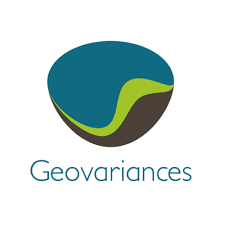</center>

# **Introduction to Cluster Analysis!**
## **Content:**

1. Data preprocessing: data cleaning and transformation.
2. Preliminary cluster analysis: dendrograms and elbow plots.
3. Clustering with different scenarios.
4. Calculation of clustering metrics: analysis and inference of groups using Davies-Bouldin and Silhouette coefficients.
5. Comparative plos and visualize scenarios.

## **Downloading data and plotting scripts**

The `curl` command downloads the repository data used for the course. If you are on Google Colaboratory session, you will also need to download the plotting scripts from Geovariances.


In [ ]:
# Downloads dataset from GitHub
!curl -o phosphate_assay_sampled_geomet.csv https://raw.githubusercontent.com/gv-americas/ml_course_americas/main/phosphate_assay_sampled_geomet.csv

# If you are in a Google Colab session, make sure to also download the GeoVariances module for plotting!
# !curl -o plotting_gv.py https://raw.githubusercontent.com/gv-americas/ml_course_americas/main/plotting_gv.py

## **Importing four libraries:**
<details>
<summary><strong>libraries</strong></summary>

**Pandas:** used for data manipulation and analysis.

**Numpy:** Used for scientific computing and working with arrays.

**Matplotlib:** Used for data visualization and creating plots.

**Plotting_gv:** A custom plotting library created by GV Americas, which contains additional plotting functions and custom styles.

</details>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotting_gv as gv

## **Reading data with Pandas**

In [ ]:
data = pd.read_csv('phosphate_assay_sampled_geomet.csv')
data

## **Recognizing data: display first few rows of our dataframe**

In [ ]:
data.head(5)

## **Printing dataframe columns**

In [ ]:
data.columns

## **Declaring variables to filter data**

In [ ]:
coords = ['X', 'Y', 'Z']

cat_var = ['ALT']

variables =  ['AL2O3', 'BAO', 'CAO', 'FE2O3', 'MGO', 'NB2O5', 'P2O5', 'SIO2', 'TIO2']

geomet = ["Reagente", "Recuperacao"]

# **Data preprocessing analysis: cleaning and processing**





## **Counting NaN values**

In [ ]:
print('Counting NaN values for each variable:')
print(data[variables].isnull().sum())

## **Descriptive statistics: full dataset**

In [ ]:
print('Full Data statistics:\n')
data[variables].describe().round(2)

## **Clean dataframe with `dataframe.dropna()`**





In [ ]:
data0 = data.dropna(subset=variables)

## **Descriptive statistics: cleaned dataset**

In [ ]:
print('Cleaned Data statistics:\n')
data0[variables].describe().round(2)

# **Data transformation: `StandardScaler()` using Sklearn.preprocessing**

$$ z = \frac{x-\mu}{\sigma}$$

Where $\mu$ is the mean of the training samples, and $\sigma$ is the standard deviation of the samples. DOcumentation can be found on [scikit-learn website](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)

In [ ]:
from sklearn.preprocessing import StandardScaler

x = data0[variables]

scaler = StandardScaler()
x_std = scaler.fit(x).transform(x)

# **Preliminary cluster analysis: dendogram and elbow plot**

## **Dendogram using `scipy.cluster.dendogram`**

Documentation can be found on [SciPy website](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.dendrogram.html)

In [ ]:
gv.dendogram(x_std, method='ward')

## **Elbow plot using KMeans Inertia**

Documentation can be found on [scikit-learn website](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)

In [ ]:
gv.elbow_plot(2, 8, x_std)

# **KMeans: running the algorithm and understanding the parameters**

Documentation can be found on [scikit-learn website](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, init="k-means++", n_init=300, random_state=1)

kmeans.fit(x_std)
data.loc[data0.index, "kmeans_5k"] = kmeans.labels_

## **Visualize clusters**

In [ ]:
gv.locmap(data['X'], data['Z'], data['kmeans_5k'], cat=True,
           figsize=(20,10), title='Cross section for clusters')

## **Hierarchichal Agglomerative: running the algorithm and understanding the parameters**

Documentation can be found on [scikit-learn website](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html)

In [ ]:
from sklearn.cluster import AgglomerativeClustering


aggl = AgglomerativeClustering(
    n_clusters=5, 
    affinity='euclidean', 
    linkage='ward',
    )


aggl.fit(x_std)  


data.loc[data0.index, 'aggl_5k'] = kmeans.labels_

## **Visualize clusters**

In [ ]:
gv.locmap(data['X'], data['Z'], data['aggl_5k'], cat=True,
           figsize=(20,10), title='Cross section for clusters')

# **Generating different scenarios with KMeans and Agglomerative: calculating performance metrics**

In [ ]:
from sklearn.metrics import davies_bouldin_score, silhouette_score

# Create empty lists to store the Davies-Bouldin and Silhouette scores for KMeans and Agglomerative clustering.

db_km = []
sl_km = []

sl_ag = []
db_ag = []

# Define the range of cluster numbers to evaluate. In this example, the min and max cluster numbers are defined beforehand, and np.arange() is used to create an array of cluster numbers to evaluate.
min = 2
max = 7

n_clus = np.arange(min, max, 1)

# Loop through each cluster number in the n_clus array.

for i in n_clus:
    # Run KMeans clustering for the current number of clusters, and append the resulting labels to the data DataFrame, with the column name kmeans_{i}k.
    print(f"Running KMeans for {i}clusters...")
    cluster = KMeans(n_clusters=i, algorithm="full")
    cluster.fit(x_std)
    labels_km = cluster.labels_
    data.loc[data0.index, f"kmeans_{i}k"] = labels_km

    # Calculate the Silhouette and Davies-Bouldin scores for the KMeans clustering, and append them to the corresponding lists.
    sl_km.append(silhouette_score(x_std, labels_km))
    db_km.append(davies_bouldin_score(x_std, labels_km))

    # Run Agglomerative clustering for the current number of clusters, and append the resulting labels to the data DataFrame, with the column name aggl_{i}k.
    print(f"Running Agglomerative for {i}clusters...")
    aggl = AgglomerativeClustering(n_clusters=i, affinity="euclidean", linkage="ward")
    aggl.fit(x_std)
    labels_ag = aggl.labels_
    data.loc[data0.index, f"aggl_{i}k"] = labels_ag

    # Calculate the Silhouette and Davies-Bouldin scores for the Agglomerative clustering, and append them to the corresponding lists.
    sl_ag.append(silhouette_score(x_std, labels_ag))
    db_ag.append(davies_bouldin_score(x_std, labels_ag))


print(
    "Ready, the clusters were calculated and inserted in your dataframe and the metrics were accumulated in the lists!"
)


## **Plotting metrics for scenario analysis**

In [ ]:
gv.cluster_metrics(n_clus, sl_km, sl_ag, db_km, db_ag)

## **Comparative plots**

In [ ]:
gv.cat1_in_cat2(data['ALT'], data['kmeans_5k'], title="CAT1 in CAT2")

In [ ]:
gv.cat1_in_cat2(data['ALT'], data['aggl_5k'], title="CAT1 in CAT2")

## **Understanding clusters distributions for each variable with boxplots**

In [ ]:
gv.boxplots(data[variables], variables, data['kmeans_5k'], 'Clusters distributions')

## **Download data clustered for supervised learning!**

In [ ]:
data.to_csv('phosphate_assay_sampled_geomet_clustered.csv', index=False)

if 'google.colab' in str(get_ipython()):
  from google.colab import files
  files.download("phosphate_assay_sampled_geomet_clustered.csv")

# **Practice**

In this exercise, you will reproduce the clustering process presented in the notebook, but with a new set of variables that will be defined based on their correlations. 

Remember: a good correlation coefficient is expected to lead to meaningful clustering results.




<details>
    <summary><strong><u>Understanding distributions</u></strong></summary>
1) Generate a scatter matrix and a correlation matrix to understand the distributions and correlations of the variables.
<details>
    <summary>&#128161;</summary>
  
gv.boxplots("parameters here")
  
</details>


In [ ]:
## code

Define a new set of variables to be used in the cluster analysis based on their correlations.

<details>
    <summary><strong><u>Understanding distributions</u></strong></summary>
2) Generate a scatter matrix and a correlation matrix to understand the distributions and correlations of the variables.
<details>
    <summary>&#128161;</summary>
  
gv.boxplots("parameters here")
  
</details>


In [ ]:
## code

<details>
    <summary><strong><u>Understanding distributions</u></strong></summary>
1) Preprocess the data by applying standardization
<details>
    <summary>&#128161;</summary>
  
StandardScaler()
  
</details>


In [ ]:
## code   



<details>
    <summary><strong><u>Understanding distributions</u></strong></summary>
1) Reproduce the clustering process from the preprocessing step to the final analyses:
<details>
    <summary>&#128161;</summary>
  
gv.elbow plot() and gv.dendrogram() to analyze the results
  
</details>


In [ ]:
## code

Generate different scenarios with the same script provided, changing only the number of desired groups.

In [ ]:
## code

<details>
    <summary><strong><u>Understanding distributions</u></strong></summary>
1) Plot the performance metrics through the cluster metrics
<details>
    <summary>&#128161;</summary>
  
gv.clustermetrics(), horizontal sections with gv.locmap() and visualize the distributions with gv.boxplots()
  
</details>


In [ ]:
## code

<center>
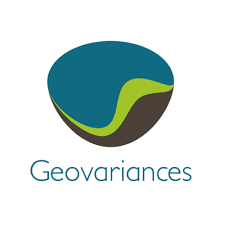</center>